In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Let's load the dataset

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Dropping irrelevant columns

In [6]:
data = data.drop(['id', 'date'], axis = 1)

In [7]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [8]:
data.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

#### Let's visualize the relationship between the dataset

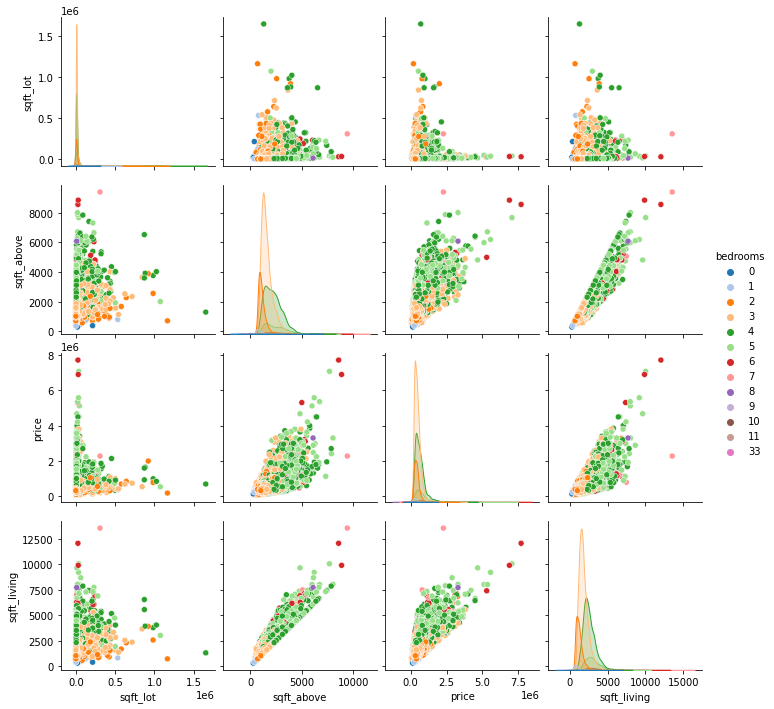

In [9]:
sns.pairplot(data[['sqft_lot','sqft_above','price','sqft_living','bedrooms']],hue="bedrooms", palette="tab20", diag_kind="kde", size=2.5);

#### Seperating independent and dependent variables and Splitting data into training and testing data

In [10]:
Y = data['price']

In [11]:
X = data.drop(['price'], axis = 1)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [13]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(17290, 18) (4323, 18)
(17290,) (4323,)


#### Let's check the correlation between the dataset

In [14]:
correlation_df = X_train.corr('spearman')

In [15]:
correlation_df

bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms       1.000000   0.525426     0.652970  0.215096  0.228141   
bathrooms      0.525426   1.000000     0.744180  0.066870  0.543562   
sqft_living    0.652970   0.744180     1.000000  0.307529  0.395675   
sqft_lot       0.215096   0.066870     0.307529  1.000000 -0.236251   
floors         0.228141   0.543562     0.395675 -0.236251  1.000000   
waterfront    -0.003516   0.055439     0.076098  0.087286  0.026732   
view           0.082347   0.155478     0.233081  0.119268  0.018843   
condition      0.011517  -0.165237    -0.060820  0.112529 -0.288346   
grade          0.382859   0.659088     0.714026  0.149299  0.503119   
sqft_above     0.544553   0.689562     0.843757  0.276586  0.596800   
sqft_basement  0.236880   0.195141     0.332095  0.036586 -0.275221   
yr_built       0.180047   0.562482     0.347104 -0.039527  0.550289   
yr_renovated   0.023860   0.048891     0.060070  0.012113  0.020037   
zipcode       -0.170593  -0.203436    -0.210517 -0.329169 -0.057361   
lat           -0.018987   0.011205     0.030905 -0.128633  0.026668   
long           0.196356   0.260183     0.287654  0.377922  0.142543   
sqft_living15  0.446989   0.565501     0.746274  0.364802  0.297806   
sqft_lot15     0.199115   0.061242     0.288691  0.923812 -0.233627   

               waterfront      view  condition     grade  sqft_above  \
bedrooms        -0.003516  0.082347   0.011517  0.382859    0.544553   
bathrooms        0.055439  0.155478  -0.165237  0.659088    0.689562   
sqft_living      0.076098  0.233081  -0.060820  0.714026    0.843757   
sqft_lot         0.087286  0.119268   0.112529  0.149299    0.276586   
floors           0.026732  0.018843  -0.288346  0.503119    0.596800   
waterfront       1.000000  0.293685   0.022532  0.066428    0.060115   
view             0.293685  1.000000   0.044622  0.218149    0.146877   
condition        0.022532  0.044622   1.000000 -0.168382   -0.157082   
grade            0.066428  0.218149  -0.168382  1.000000    0.709346   
sqft_above       0.060115  0.146877  -0.157082  0.709346    1.000000   
sqft_basement    0.054659  0.235378   0.165580  0.095306   -0.160815   
yr_built        -0.030709 -0.067411  -0.397823  0.501700    0.465977   
yr_renovated     0.092024  0.099514  -0.067544  0.020830    0.040410   
zipcode          0.033211  0.078309  -0.022151 -0.180281   -0.279724   
lat             -0.019596 -0.001697  -0.018839  0.103780   -0.026336   
long            -0.039182 -0.101864  -0.086404  0.222888    0.386747   
sqft_living15    0.076112  0.253118  -0.086234  0.656254    0.693690   
sqft_lot15       0.095240  0.118896   0.114140  0.155083    0.259100   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
bedrooms            0.236880  0.180047      0.023860 -0.170593 -0.018987   
bathrooms           0.195141  0.562482      0.048891 -0.203436  0.011205   
sqft_living         0.332095  0.347104      0.060070 -0.210517  0.030905   
sqft_lot            0.036586 -0.039527      0.012113 -0.329169 -0.128633   
floors             -0.275221  0.550289      0.020037 -0.057361  0.026668   
waterfront          0.054659 -0.030709      0.092024  0.033211 -0.019596   
view                0.235378 -0.067411      0.099514  0.078309 -0.001697   
condition           0.165580 -0.397823     -0.067544 -0.022151 -0.018839   
grade               0.095306  0.501700      0.020830 -0.180281  0.103780   
sqft_above         -0.160815  0.465977      0.040410 -0.279724 -0.026336   
sqft_basement       1.000000 -0.177474      0.061999  0.109085  0.115498   
yr_built           -0.177474  1.000000     -0.216029 -0.311883 -0.122336   
yr_renovated        0.061999 -0.216029      1.000000  0.061873  0.025889   
zipcode             0.109085 -0.311883      0.061873  1.000000  0.254732   
lat                 0.115498 -0.122336      0.025889  0.254732  1.000000   
long               -0.194113  0.410311     -0.072822 -0.582594 -0.151295   
sqft

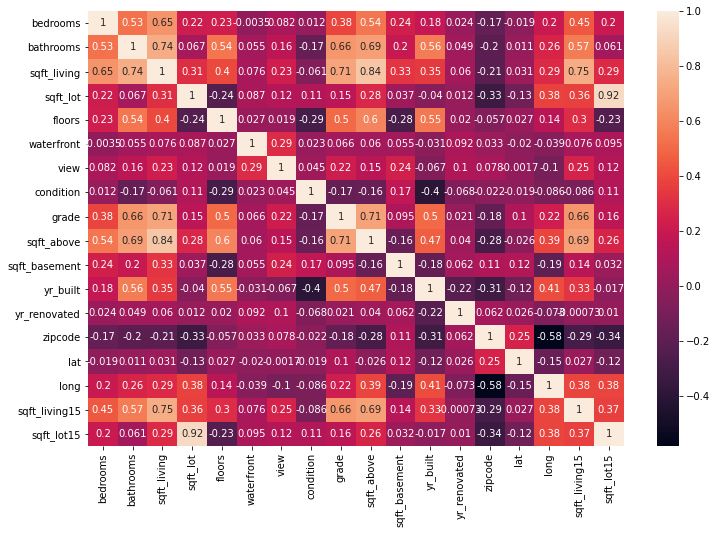

In [16]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation_df, annot = True)
plt.show()

In [17]:
X_const1 = sm.add_constant(X_train)

In [18]:
X_const1

const  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
5268     1.0         3       1.00         1570      5510     1.0           0   
16909    1.0         3       2.50         1780     11000     1.0           0   
16123    1.0         3       1.50         1090      9862     1.0           0   
12181    1.0         4       2.50         2210      7079     2.0           0   
12617    1.0         3       2.50         1800      4763     2.0           0   
...      ...       ...        ...          ...       ...     ...         ...   
13123    1.0         5       5.00         3960     94089     2.0           0   
19648    1.0         2       2.50         1400      1262     2.0           0   
9845     1.0         3       2.25         2360     14950     1.0           0   
10799    1.0         4       2.00         2370     76665     2.0           0   
2732     1.0         4       2.25         2380     16236     1.0           0   

       view  condition  grade  sqft_above  sqft_basement  yr_built  \
5268      0          4      7        1070            500      1940   
16909     0          4      8        1210            570      1980   
16123     0          3      8        1090              0      1987   
12181     0          3      8        2210              0      1993   
12617     0          3      7        1240            560      1985   
...     ...        ...    ...         ...            ...       ...   
13123     0          3     10        3960              0      1998   
19648     0          3      8        1160            240      2008   
9845      0          4      9        2360              0      1978   
10799     0          4      8        2370              0      1978   
2732      0          3      7        1540            840      1961   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
5268              0    98115  47.6942 -122.319           1770        6380  
16909             0    98006  47.5574 -122.149           2310        9700  
16123             0    98074  47.6256 -122.036           1710        9862  
12181             0    98031  47.4206 -122.183           1970        7000  
12617             0    98119  47.6460 -122.362           1790        4763  
...             ...      ...      ...      ...            ...         ...  
13123             0    98038  47.3800 -122.011           2240       64468  
19648             0    98106  47.5342 -122.349           1060        1524  
9845              0    98042  47.3856 -122.158           2720       14388  
10799             0    98001  47.2831 -122.279           2110       19334  
2732              0    98008  47.6126 -122.120           2230        8925  

[17290 rows x 19 columns]

In [19]:
X_const1.shape

(17290, 19)

In [20]:
lr_model = sm.OLS(Y_train, X_const1).fit()

In [21]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2377.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:41:00   Log-Likelihood:            -2.3590e+05
No. Observations:               17290   AIC:                         4.718e+05
Df Residuals:                   17272   BIC:                         4.720e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.166e+06   3.32e+06      1.256      0.209   -2.34e+06    1.07e+07
bedrooms      -3.467e+04   2115.086    -16.394      0.000   -3.88e+04   -3.05e+04
bathrooms      3.943e+04   3665.905     10.756      0.000    3.22e+04    4.66e+04
sqft_living     112.6123      2.564     43.912      0.000     107.586     117.639
sqft_lot          0.1759      0.055      3.211      0.001       0.069       0.283
floors         7424.5680   4059.376      1.829      0.067    -532.221    1.54e+04
waterfront     6.056e+05   1.91e+04     31.778      0.000    5.68e+05    6.43e+05
view           5.274e+04   2426.020     21.738      0.000     4.8e+04    5.75e+04
condition      2.617e+04   2671.846      9.795      0.000    2.09e+04    3.14e+04
grade          9.359e+04   2436.483     38.412      0.000    8.88e+04    9.84e+04
sqft_above       72.7856      2.535     28.714      0.000      67.817      77.754
sqft_basement    39.8208      2.997     13.287      0.000      33.946      45.695
yr_built      -2607.1370     82.061    -31.771      0.000   -2767.985   -2446.289
yr_renovated     20.1053      4.084      4.923      0.000      12.100      28.110
zipcode        -567.4688     37.480    -15.141      0.000    -640.932    -494.005
lat            6.049e+05   1.22e+04     49.739      0.000    5.81e+05    6.29e+05
long          -2.224e+05    1.5e+04    -14.869      0.000   -2.52e+05   -1.93e+05
sqft_living15    24.2334      3.879      6.247      0.000      16.630      31.837
sqft_lot15       -0.4675      0.084     -5.568      0.000      -0.632      -0.303
==============================================================================
Omnibus:                    14720.834   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1535890.927
Skew:                           3.559   Prob(JB):                         0.00
Kurtosis:                      48.621   Cond. No.                     3.16e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
lr_model.params

const            4.166135e+06
bedrooms        -3.467428e+04
bathrooms        3.943100e+04
sqft_living      1.126123e+02
sqft_lot         1.758887e-01
floors           7.424568e+03
waterfront       6.056005e+05
view             5.273689e+04
condition        2.616952e+04
grade            9.359015e+04
sqft_above       7.278563e+01
sqft_basement    3.982079e+01
yr_built        -2.607137e+03
yr_renovated     2.010530e+01
zipcode         -5.674688e+02
lat              6.048660e+05
long            -2.223920e+05
sqft_living15    2.423338e+01
sqft_lot15      -4.674501e-01
dtype: float64

In [23]:
X_const2 = sm.add_constant(X_test)

In [24]:
X_const2

const  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
17384    1.0         2       1.50         1430      1650     3.0           0   
722      1.0         4       3.25         4670     51836     2.0           0   
2680     1.0         2       0.75         1440      3700     1.0           0   
18754    1.0         2       1.00         1130      2640     1.0           0   
14554    1.0         4       2.50         3180      9603     2.0           0   
...      ...       ...        ...          ...       ...     ...         ...   
5427     1.0         4       3.25         3090     67518     2.0           0   
16547    1.0         3       1.75         1260      8487     1.0           0   
4585     1.0         3       2.50         1360      3718     2.0           0   
17762    1.0         3       1.00          950      4760     1.5           0   
16323    1.0         3       2.25         1640     12000     1.0           0   

       view  condition  grade  sqft_above  sqft_basement  yr_built  \
17384     0          3      7        1430              0      1999   
722       0          4     12        4670              0      1988   
2680      0          3      7        1200            240      1914   
18754     0          4      8        1130              0      1927   
14554     2          3      9        3180              0      2002   
...     ...        ...    ...         ...            ...       ...   
5427      0          3     10        3090              0      1988   
16547     0          3      7        1260              0      1970   
4585      0          3      7        1360              0      1987   
17762     0          3      6         950              0      1929   
16323     0          3      7        1180            460      1967   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
17384             0    98125  47.7222 -122.290           1430        1650  
722               0    98005  47.6350 -122.164           4230       41075  
2680              0    98107  47.6707 -122.364           1440        4300  
18754             0    98109  47.6438 -122.357           1680        3200  
14554             0    98155  47.7717 -122.277           2440       15261  
...             ...      ...      ...      ...            ...         ...  
5427              0    98053  47.6674 -122.046           3200       65775  
16547             0    98011  47.7664 -122.201           1890       13051  
4585              0    98052  47.6827 -122.097           1090        3718  
17762             0    98106  47.5236 -122.348           1080        4760  
16323             0    98008  47.6252 -122.104           1620       12000  

[4323 rows x 19 columns]

In [25]:
Predicted_Y = lr_model.predict(X_const2)

In [26]:
Actual_Y = Y_test

In [27]:
error = (Actual_Y - Predicted_Y)

In [28]:
act_vs_pred = pd.DataFrame({'Actual':Actual_Y, 'Predicted':Predicted_Y, 'Error':error})

In [29]:
act_vs_pred.head()

Actual     Predicted          Error
17384   297000.0  3.784482e+05  -81448.215621
722    1578000.0  1.539749e+06   38250.630550
2680    562100.0  5.444599e+05   17640.097256
18754   631500.0  5.778039e+05   53696.064941
14554   780000.0  9.799229e+05 -199922.928693

In [30]:
rmse = np.sqrt(np.mean(np.square(error)))

In [31]:
rmse

190473.37551180169